In [3]:
import os
import sys
sys.path.append(os.path.abspath("/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/simulator"))
from simulate import Simulator

In [4]:
tmean_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/tmean_prism_pennsylvania_data_1990_2023.csv'
ppt_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/ppt_prism_pennsylvania_data_1990_2023.csv'
forage_path = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/R_scripts/output/pa_spring_floral_resource_quality_4km_by_4km.csv'
# simulator = Simulator(tmean_path=tmean_path, ppt_path=ppt_path, forage_path=forage_path,vectorize=False)

In [5]:
simulator = Simulator(ppt_path=ppt_path, tmean_path=tmean_path, forage_path=forage_path, vectorize=True)

In [6]:
grids = simulator.tmean[["col","row","grid_id"]]

In [6]:
# define config parameters
years = range(2008, 2024)
longevity = 22
mating_days = 2
egg_larva_dev_days = 18
temperature_threshold=18.724609
precipitation_threshold=4.331055
forage_threshold= 0.540137
egg_larva_days=18
egg_larva_mortality_delta=0.1
lower_thermal_threshold=10
upper_thermal_threshold=30
pre_winter_mortality_delta=0.0025
diapause_threshold=15
diapause_start = [8, 15]
diapause_end = [10, 1]

# Forage_Threshold     0.510254
# Temp_Threshold      17.294922
# Precip_Threshold     1.225586
# R2                   0.999822

 
# Forage_Threshold     0.540137
# Temp_Threshold      18.724609
# Precip_Threshold     4.331055
# R2                   0.602118

In [7]:
len(years)

16

In [107]:
# Get emergence dates
for year in years:
    grids[f"emergence_{year}"] = grids.apply(lambda x: simulator.emergence(x["col"], x["row"], year), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_33500/1766537747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"emergence_{year}"] = grids.apply(lambda x: simulator.emergence(x["col"], x["row"], year), axis=1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_33500/1766537747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"emergence_{year}"] = grids.apply(lambda x: simulator.emergence(x["col"], x["row"], year), axis=1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000

In [108]:
# simulate egg production
for year in years:
    grids[f"egg_production_{year}"] = grids.apply(lambda x: simulator.eggProduction(x["col"], x["row"], x[f"emergence_{year}"], vectorize=True, longevity=22, temperature_threshold=temperature_threshold, mating_days=mating_days, precipitation_threshold=precipitation_threshold, forage_threshold=forage_threshold), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_33500/852754876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"egg_production_{year}"] = grids.apply(lambda x: simulator.eggProduction(x["col"], x["row"], x[f"emergence_{year}"], vectorize=True, longevity=22, temperature_threshold=temperature_threshold, mating_days=mating_days, precipitation_threshold=precipitation_threshold, forage_threshold=forage_threshold), axis=1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_33500/852754876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [109]:
# simulate egg larva mortality
for year in years:
    grids[f"egg_larvar_mortality_{year}"] = grids.apply(lambda x: simulator.eggLarvaMortality(x["col"], x["row"], x[f"emergence_{year}"], x[f"egg_production_{year}"], vectorize=True, mating_days=mating_days, egg_larva_days=egg_larva_days, longevity=longevity, mortality_delta=egg_larva_mortality_delta, lower_thermal_threshold=lower_thermal_threshold, upper_thermal_threshold=upper_thermal_threshold), axis=1)

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_33500/2158909627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"egg_larvar_mortality_{year}"] = grids.apply(lambda x: simulator.eggLarvaMortality(x["col"], x["row"], x[f"emergence_{year}"], x[f"egg_production_{year}"], vectorize=True, mating_days=mating_days, egg_larva_

In [110]:
# simulate pre-winter mortality
for year in years:
    grids[f'winter_mortality_{year}'] = grids.apply(lambda x: simulator.preWinterMortality(x["col"], x["row"], year, pre_winter_delta=pre_winter_mortality_delta, dev_temp=diapause_threshold, startdate=diapause_start, enddate=diapause_end), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_33500/1279339857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f'winter_mortality_{year}'] = grids.apply(lambda x: simulator.preWinterMortality(x["col"], x["row"], year, pre_winter_delta=pre_winter_mortality_delta, dev_temp=diapause_threshold, startdate=diapause_start, enddate=diapause_end), axis=1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_33500/1279339857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f'wint

In [111]:
grids.to_csv("output_4.csv")

In [12]:
# define config parameters
years = range(2008, 2024)
longevity = 22
mating_days = 2
egg_larva_dev_days = 18
temperature_threshold=19.84
precipitation_threshold=0.20
forage_threshold=0.54
egg_larva_days=18
egg_larva_mortality_delta=0.1
lower_thermal_threshold=10
upper_thermal_threshold=30
pre_winter_mortality_delta=0.0025
diapause_threshold=15
diapause_start = [8, 15]
diapause_end = [10, 1]

In [13]:
# simulate egg production
for year in years:
    grids[f"egg_production_{year}"] = grids.apply(lambda x: simulator.eggProduction(x["col"], x["row"], x[f"emergence_{year}"], vectorize=True, longevity=22, temperature_threshold=temperature_threshold, mating_days=mating_days, precipitation_threshold=precipitation_threshold, forage_threshold=forage_threshold), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_75572/852754876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"egg_production_{year}"] = grids.apply(lambda x: simulator.eggProduction(x["col"], x["row"], x[f"emergence_{year}"], vectorize=True, longevity=22, temperature_threshold=temperature_threshold, mating_days=mating_days, precipitation_threshold=precipitation_threshold, forage_threshold=forage_threshold), axis=1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_75572/852754876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [14]:
# simulate egg larva mortality
for year in years:
    grids[f"egg_larvar_mortality_{year}"] = grids.apply(lambda x: simulator.eggLarvaMortality(x["col"], x["row"], x[f"emergence_{year}"], x[f"egg_production_{year}"], vectorize=True, mating_days=mating_days, egg_larva_days=egg_larva_days, longevity=longevity, mortality_delta=egg_larva_mortality_delta, lower_thermal_threshold=lower_thermal_threshold, upper_thermal_threshold=upper_thermal_threshold), axis=1)

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_75572/2158909627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f"egg_larvar_mortality_{year}"] = grids.apply(lambda x: simulator.eggLarvaMortality(x["col"], x["row"], x[f"emergence_{year}"], x[f"egg_production_{year}"], vectorize=True, mating_days=mating_days, egg_larva_

In [15]:
# simulate pre-winter mortality
for year in years:
    grids[f'winter_mortality_{year}'] = grids.apply(lambda x: simulator.preWinterMortality(x["col"], x["row"], year, pre_winter_delta=pre_winter_mortality_delta, dev_temp=diapause_threshold, startdate=diapause_start, enddate=diapause_end), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_75572/1279339857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f'winter_mortality_{year}'] = grids.apply(lambda x: simulator.preWinterMortality(x["col"], x["row"], year, pre_winter_delta=pre_winter_mortality_delta, dev_temp=diapause_threshold, startdate=diapause_start, enddate=diapause_end), axis=1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_75572/1279339857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grids[f'wint

In [16]:
grids.to_csv("output_2.csv")

In [7]:
import pandas as pd
grids = pd.read_csv("output_4.csv")

In [8]:
## Visualize the output ##
import geopandas as gpd
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("output_4.csv")

# output_1 - Literature review data
# output_2 - Linear regression high R2
# output_3 - lme model with time_point restructuring
# output_4 - lme model with tieme_point as part of effect

In [10]:
pennsylvania_grids = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/pennsylvania_prism_grids/grids.shp')
pennsylvania_county = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/data/PA County Boundaries Spatial Data Current Transportation_20241020/geo_export_6cef9481-2bbb-4662-924f-c066da87393b.shp')

In [11]:
data["geometry"] = pennsylvania_grids["geometry"]
data['lat'] = pennsylvania_grids['lat']
data['lon'] = pennsylvania_grids['lon']
data = gpd.GeoDataFrame(data)

In [12]:
data1 = data.copy()

In [13]:
num_years = 16
start_year = 2008
for i in range(num_years):
    year = start_year + i
    data1[f"eggs_{year}"] = [eval(x)['eggs'] for x in data1[f"egg_production_{year}"].tolist()]
    #data1[f"larvae_mortality_{year}"] = [eval(x)['egg_mortality'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    egg_mortlity = []
    for x in data1[f"egg_larvar_mortality_{year}"].tolist():
        try:
            dt = eval(x)
            egg_mortlity.append(dt['mortality'])
        except:
            egg_mortlity.append(0)
    data1[f"larvae_mortality_{year}"] = egg_mortlity
    #data1[f"larvae_cold_days_{year}"] = [eval(x)['cold_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    #data1[f"larvae_hot_days_{year}"] = [eval(x)['hot_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    data1[f"wintering_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"winter_mortality_{year}"].tolist()]
    


In [14]:
num_years = 16
start_year = 2008
for i in range(num_years):
    year = start_year + i
    data1[f"offspring_{year}"] = data1[f'eggs_{year}'] * (1 - data1[f'larvae_mortality_{year}']) * (1 - data1[f'wintering_mortality_{year}'])

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/2864038394.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


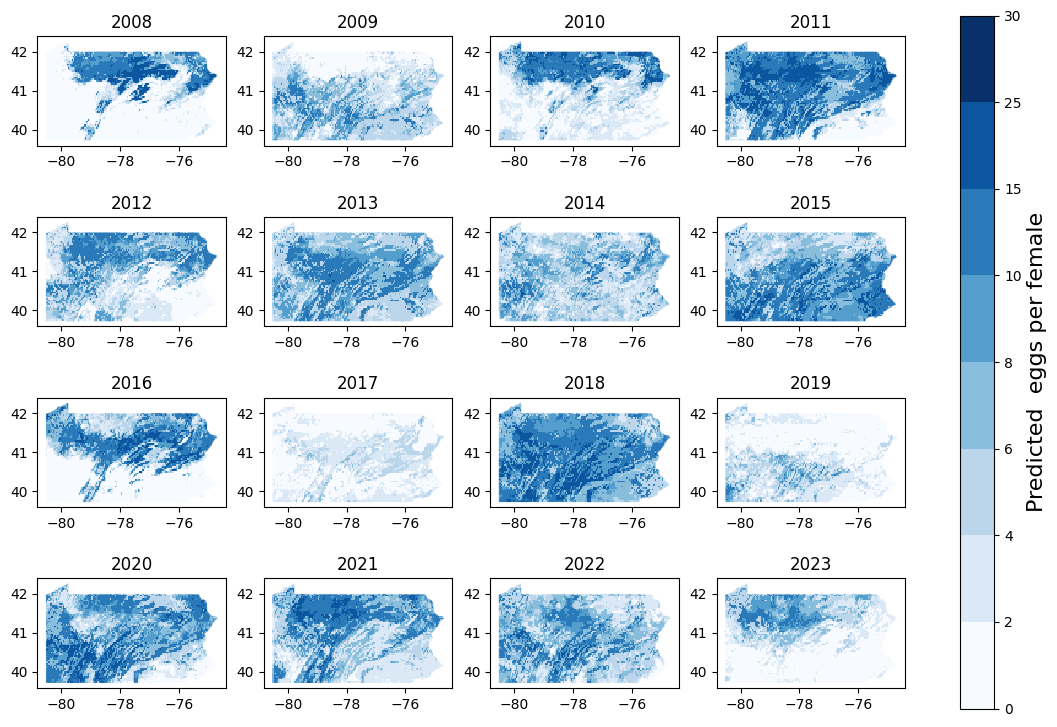

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define your custom bin edges
#bins = [0,2,4,6,8,10,20]
#bins = [0,5,10,15,20,25,30,35,40]
bins = [0,2,4,6,8,10,15,25, 30]

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
#cmap = plt.cm.get_cmap('Grays', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Create a figure and subplots dynamically for each year
num_years = 16  # Number of years from 2008 to 2021
fig, axes = plt.subplots(4, 4, figsize=(14, 9))  # 2 rows, 7 columns for 14 years

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each year
for i in range(num_years):
    year = 2008 + i
    ax = axes[i]  # Get the current axis
    
    # Plot for the current year
    data1.plot(column=f'offspring_{year}', cmap=cmap, norm=norm, legend=False, ax=ax)
    #data1.plot(column='eggs_1_2023', cmap='Blues', legend=True, ax=ax)
    ax.set_title(str(year))  # Set the title of the subplot

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy data
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_label('Predicted  eggs per female', fontsize=16)  # label for the colorbar

# Add a title to the figure
#fig.suptitle('Reproduction Visualization')

# Show the plots
plt.show()


In [18]:
all_eggs = []
for i in range(num_years):
    year = 2008 + i
    all_eggs.extend(data1[f'eggs_{year}'])

max(all_eggs)

26

In [23]:
data1.columns.tolist()

['Unnamed: 0',
 'col',
 'row',
 'grid_id',
 'emergence_2008',
 'emergence_2009',
 'emergence_2010',
 'emergence_2011',
 'emergence_2012',
 'emergence_2013',
 'emergence_2014',
 'emergence_2015',
 'emergence_2016',
 'emergence_2017',
 'emergence_2018',
 'emergence_2019',
 'emergence_2020',
 'emergence_2021',
 'emergence_2022',
 'emergence_2023',
 'egg_production_2008',
 'egg_production_2009',
 'egg_production_2010',
 'egg_production_2011',
 'egg_production_2012',
 'egg_production_2013',
 'egg_production_2014',
 'egg_production_2015',
 'egg_production_2016',
 'egg_production_2017',
 'egg_production_2018',
 'egg_production_2019',
 'egg_production_2020',
 'egg_production_2021',
 'egg_production_2022',
 'egg_production_2023',
 'egg_larvar_mortality_2008',
 'egg_larvar_mortality_2009',
 'egg_larvar_mortality_2010',
 'egg_larvar_mortality_2011',
 'egg_larvar_mortality_2012',
 'egg_larvar_mortality_2013',
 'egg_larvar_mortality_2014',
 'egg_larvar_mortality_2015',
 'egg_larvar_mortality_2016',

In [26]:
all_eggs = []
for i in range(num_years):
    year = 2008 + i
    all_eggs.extend(data1[f'offspring_{year}'])

max(all_eggs)

23.400000000000002

In [28]:
pd.DataFrame(all_eggs).describe()

,0
count,119232.00000
mean,6.39573
std,4.56851
min,0.00000
25%,2.70750
50%,5.46000
75%,9.15000
max,23.40000


In [50]:
data1[[ 'offspring_2008',
 'offspring_2009',
 'offspring_2010',
 'offspring_2011',
 'offspring_2012',
 'offspring_2013',
 'offspring_2014',
 'offspring_2015',
 'offspring_2016',
 'offspring_2017',
 'offspring_2018',
 'offspring_2019',
 'offspring_2020',
 'offspring_2021',
 'offspring_2022',
 'offspring_2023','grid_id']]

,offspring_2008,offspring_2009,offspring_2010,offspring_2011,offspring_2012,offspring_2013,offspring_2014,offspring_2015,offspring_2016,offspring_2017,offspring_2018,offspring_2019,offspring_2020,offspring_2021,offspring_2022,offspring_2023,grid_id
0,2.6550,0.8100,7.180,6.23,7.2200,3.7105,4.5125,3.28375,7.9650,0.905,8.0325,2.6475,5.4000,6.7640,3.6100,3.5700,1083_184
1,1.7750,0.8100,7.180,6.23,7.2200,3.7105,4.5250,3.73800,8.8500,1.810,8.0550,2.6475,5.4150,5.8740,4.5125,4.2720,1084_184
2,0.7100,0.9000,8.975,6.23,5.4300,3.9820,5.4300,4.62800,11.5050,1.810,7.1600,2.6475,7.2200,4.9840,4.5125,5.1475,1085_184
3,0.8875,3.6000,5.385,7.12,4.5250,3.0770,5.4300,7.03100,9.7350,1.805,7.1600,3.5300,8.1225,4.9840,5.4150,5.2215,1086_184
4,5.3100,1.6200,16.155,12.46,12.6350,7.4210,9.0250,8.16500,19.4700,1.810,16.0200,8.8250,8.9750,9.9680,9.0250,10.3240,1081_185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,0.7120,5.8575,2.824,0.00,1.7900,4.5000,4.4750,9.70750,0.0000,2.492,5.3100,0.6195,1.7950,2.3010,4.4750,0.0000,1178_245
7448,0.7120,5.8575,3.530,0.00,0.8950,4.5000,5.3700,9.70750,0.0000,2.492,5.3100,0.6195,1.7950,3.0090,5.3700,0.0000,1179_245
7449,0.7965,4.0710,3.530,0.00,0.8925,3.6000,6.2650,9.70750,0.8010,2.485,5.3100,0.6195,1.7950,2.3010,5.3700,0.0000,1180_245
7450,0.7080,4.0710,3.530,0.00,0.8925,3.6000,7.1600,21.18000,1.5975,2.471,5.3100,0.6195,1.7950,2.3010,2.6850,0.5340,1181_245


In [32]:
######## sensitivity analysis ########

In [29]:
### extract the data for each year
# non_foraging_days = []
# emergence_dates = []
# precip_effect_days = []
# temp_effect_days = []
years = []  
offsprings = []
col = []
row = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    # # non_foraging days
    # non_foraging_days.extend(data1[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(data1[f"eggs_{year}"].tolist()))
    # # emergence date
    # emergence_dates.extend(data1[f"emergence_{year}"].tolist())
    # # precip_effect_days
    # precip_effect_days.extend(data1[f"precip_effect_{year}"].tolist())
    # # temp_effect_days
    # temp_effect_days.extend(data1[f"temp_effect_{year}"].tolist())
    # offsprings
    offsprings.extend(data1[f"eggs_{year}"].tolist())

df_pa = pd.DataFrame({'Year': years, 'eggs': offsprings})

In [30]:
df_pa.head()

,Year,eggs
0,2008,3
1,2008,2
2,2008,1
3,2008,1
4,2008,6


In [31]:
years = range(2008, 2024)
data1['total_eggs'] = [sum([data1[f'eggs_{year}'][i] for year in years]) for i in range(len(data1))]
data1['avg_eggs'] = [np.mean([data1[f'eggs_{year}'][i] for year in years]) for i in range(len(data1))]
data1['zeros_eggs'] = [ len([data1[f'eggs_{year}'][i] for year in years if data1[f'eggs_1_{year}'][i] == 0 ]) for i in range(len(data1))]

KeyError: 'eggs_1_2008'

In [32]:
data2 = data1.copy()

In [33]:
data2['geometry'] = gpd.points_from_xy(data2.lon, data2.lat)

In [34]:
pennsylvania_county1 = gpd.read_file('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/data/PA County Boundaries Spatial Data Current Transportation_20241020')
pennsylvania_county1 = pennsylvania_county1.to_crs('EPSG:4369')
data2 = pennsylvania_county1.sjoin(data2, how='inner')

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:2391: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4369
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [35]:
dt = data2[['county_nam', 'avg_eggs']].groupby('county_nam', as_index=False).mean()

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/1610172491.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/1610172491.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['avg_eggs']):


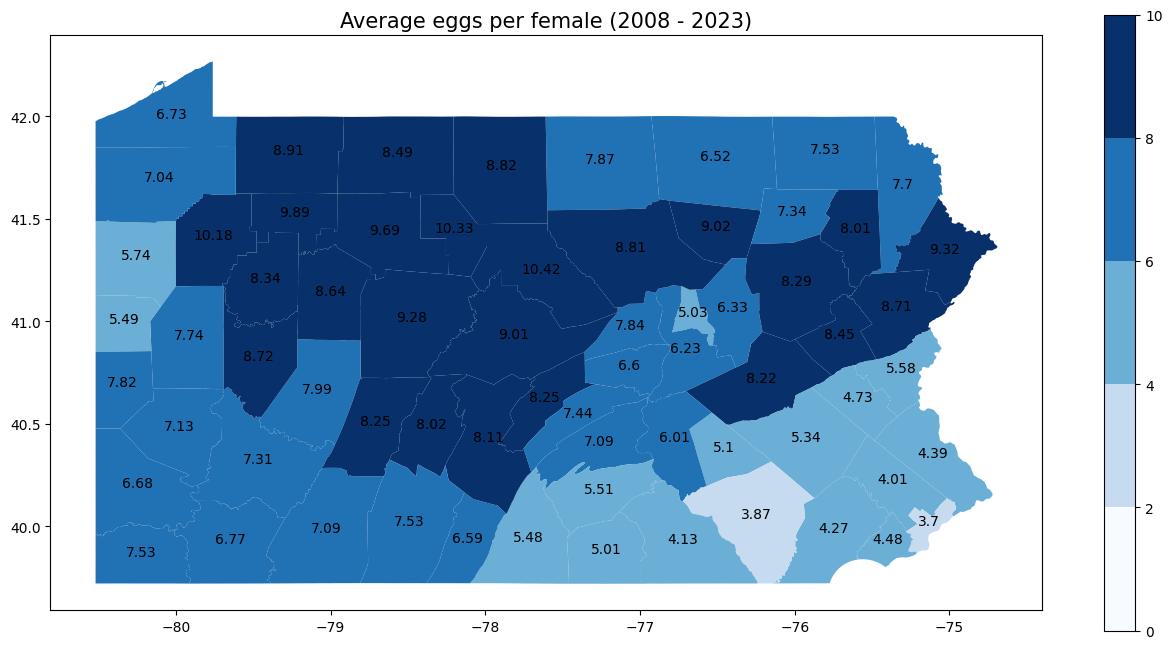

In [37]:
dt = data2[['county_nam', 'avg_eggs']].groupby('county_nam', as_index=False).mean()

# Define your custom bin edges
bins = [0, 2, 4, 6, 8, 10]

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

merged_data = pennsylvania_county.merge(dt, on='county_nam')
merged_data.plot(column='avg_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y, label, fontsize=6, ha='center')

# Add county names to the plot
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['avg_eggs']):
    ax.text(x, y, round(label,2), fontsize=10, ha='center')

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y+0.04, label, fontsize=7, ha='center')

plt.title('Average eggs per female (2008 - 2023)', fontsize=15)
plt.show()

In [38]:
dt = data2[['county_nam', 'zeros_eggs']].groupby('county_nam', as_index=False).mean()

# Define your custom bin edges
bins = [0, 2, 4, 6, 8, 10]

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Reds', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

merged_data = pennsylvania_county.merge(dt, on='county_nam')
merged_data.plot(column='zeros_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y, label, fontsize=6, ha='center')

# Add county names to the plot
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['zeros_eggs']):
    ax.text(x, y, round(label,2), fontsize=10, ha='center')

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y+0.04, label, fontsize=7, ha='center')

plt.title('Average number of years with no eggs laid (2008 - 2023)', fontsize=15)
plt.show()

KeyError: "['zeros_eggs'] not in index"

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/2122994969.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/2122994969.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['total_eggs']):


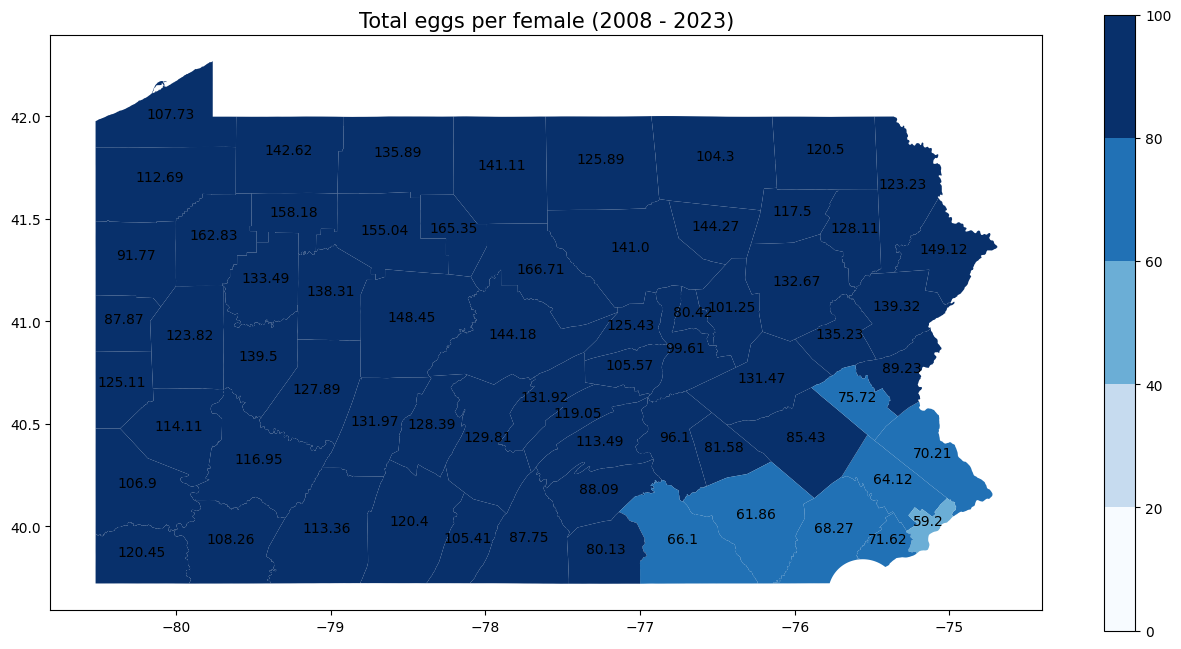

In [39]:
dt = data2[['county_nam', 'total_eggs']].groupby('county_nam', as_index=False).mean()

# Define your custom bin edges
bins = [0, 20, 40, 60, 80, 100]

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

merged_data = pennsylvania_county.merge(dt, on='county_nam')
merged_data.plot(column='total_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y, label, fontsize=6, ha='center')

# Add county names to the plot
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['total_eggs']):
    ax.text(x, y, round(label,2), fontsize=10, ha='center')

# Add county names to the plot
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['county_nam']):
#    ax.text(x, y+0.04, label, fontsize=7, ha='center')

plt.title('Total eggs per female (2008 - 2023)', fontsize=15)
plt.show()

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/1677188356.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


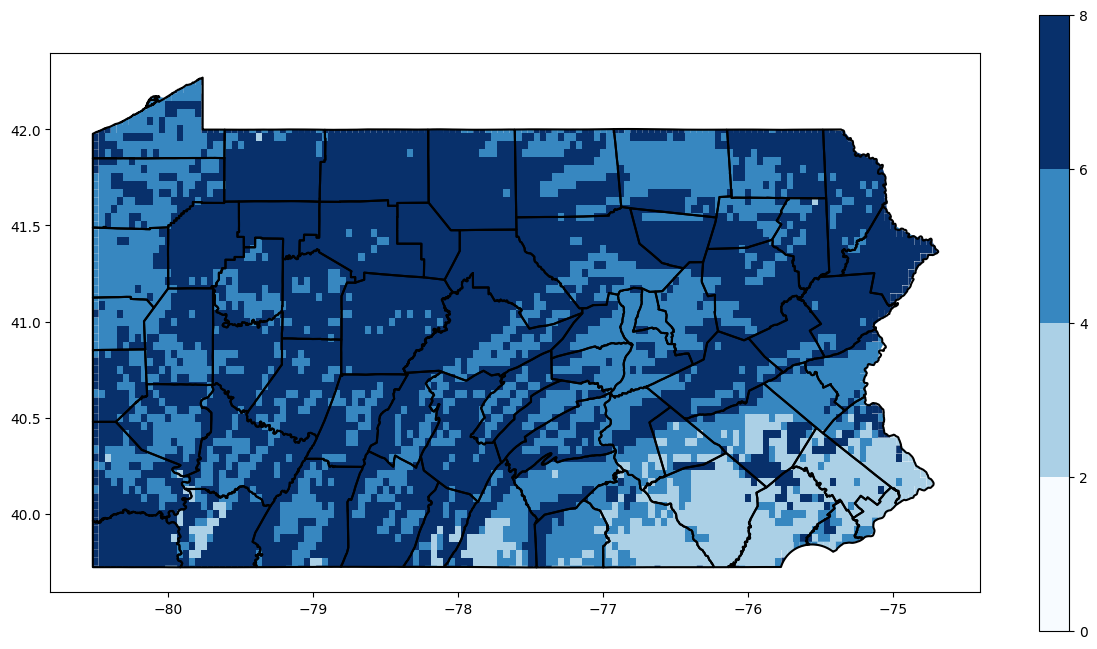

In [40]:
# Define your custom bin edges
#bins = [0, 4, 8, 12, 16, 20, 24]
bins = [0, 2, 4, 6, 8]

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)
data1.plot(column=f'avg_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)
pennsylvania_county.boundary.plot(ax=ax, color='black') 


sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])  # dummy data
cbar = fig.colorbar(sm1, ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_label('Predicted  eggs per female', fontsize=12)  # label for the colorbar

plt.show()


/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/1190662315.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', len(bins) - 1)


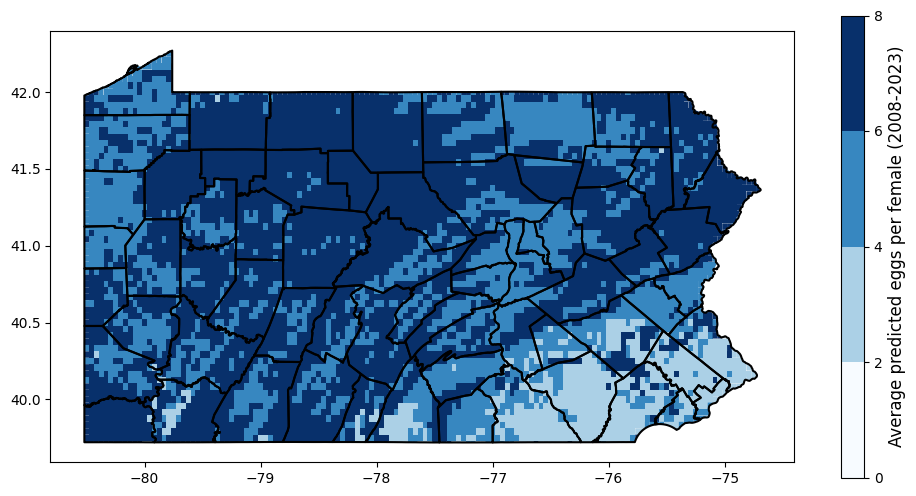

In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

bins = [0, 2, 4, 6, 8]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Blues', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)

# Plot the data with a legend title
data1.plot(column='avg_eggs', cmap=cmap, norm=norm,  ax=ax)
           #legend_kwds={'label': "Average predicted eggs per female", 'orientation': "vertical"})

pennsylvania_county.boundary.plot(ax=ax, color='black')

# # Set up the colorbar
sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])
cbar = fig.colorbar(sm1, ax=ax, orientation='vertical')
cbar.set_label('Average predicted eggs per female (2008-2023)', fontsize=12)

plt.show()


/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_77302/3991920703.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Reds', len(bins) - 1)


KeyError: 'zeros_eggs'

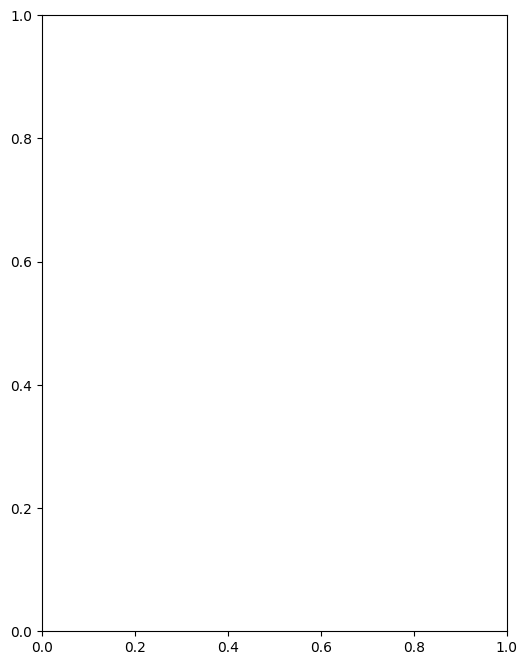

In [43]:
# Define your custom bin edges
#bins = [0, 4, 8, 12, 16, 20, 24]
bins = [0, 2, 4, 6, 8]

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# Create a colormap and normalize it based on your bin edges
cmap = plt.cm.get_cmap('Reds', len(bins) - 1)
norm = mcolors.BoundaryNorm(bins, len(bins) - 1)
data1.plot(column=f'zeros_eggs', cmap=cmap, norm=norm, legend=True, ax=ax)
pennsylvania_county.boundary.plot(ax=ax, color='black') 

# Set the legend label
#fig.set_label('Number of Offsprings')

plt.title('Average number of years with no eggs laid (2008 - 2023)', fontsize=15)

In [44]:
data1['avg_eggs'].describe()

count    7452.000000
mean        7.367468
std         2.489931
min         3.000000
25%         4.937500
50%         8.000000
75%         9.500000
max        12.750000
Name: avg_eggs, dtype: float64

In [45]:
data1['zeros_eggs'].describe()

KeyError: 'zeros_eggs'

<Axes: >

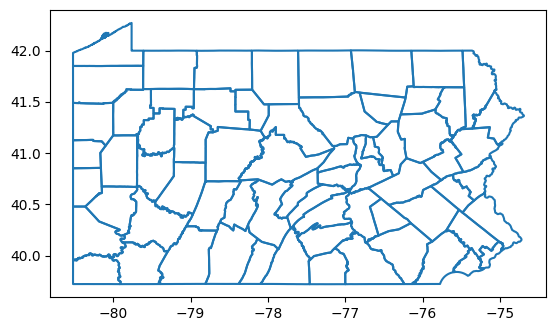

In [46]:
pennsylvania_county.boundary.plot()

In [47]:
### extract the data for each year
# non_foraging_days = []
# emergence_dates = []
# precip_effect_days = []
# temp_effect_days = []
years = []  
offsprings = []
col = []
row = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    # # non_foraging days
    # non_foraging_days.extend(data1[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(data1[f"eggs_{year}"].tolist()))
    # # emergence date
    # emergence_dates.extend(data1[f"emergence_{year}"].tolist())
    # # precip_effect_days
    # precip_effect_days.extend(data1[f"precip_effect_{year}"].tolist())
    # # temp_effect_days
    # temp_effect_days.extend(data1[f"temp_effect_{year}"].tolist())
    # offsprings
    offsprings.extend(data1[f"eggs_{year}"].tolist())
    col.extend(data1['col'].tolist())
    row.extend(data1['row'].tolist())

df_pa = pd.DataFrame({'Year': years, 'eggs': offsprings, 'col': col, 'row': row})

In [48]:
df_pa.head()

,Year,eggs,col,row
0,2008,3,1083,184
1,2008,2,1084,184
2,2008,1,1085,184
3,2008,1,1086,184
4,2008,6,1081,185


In [49]:
df_pa.tail()

,Year,eggs,col,row
119227,2023,0,1178,245
119228,2023,0,1179,245
119229,2023,0,1180,245
119230,2023,1,1181,245
119231,2023,4,1182,245


In [50]:
df_pa

,Year,eggs,col,row
0,2008,3,1083,184
1,2008,2,1084,184
2,2008,1,1085,184
3,2008,1,1086,184
4,2008,6,1081,185
...,...,...,...,...
119227,2023,0,1178,245
119228,2023,0,1179,245
119229,2023,0,1180,245
119230,2023,1,1181,245


In [51]:
df1 = df_pa.groupby(['col', 'row'], as_index=False).std()

In [52]:
df_pa.groupby(['col', 'row'], as_index=False).std()['eggs']/df_pa.groupby(['col', 'row'], as_index=False).mean()['eggs']

0       0.481543
1       0.403324
2       0.487308
3       0.513952
4       0.465116
          ...   
7447    0.949890
7448    0.522798
7449    0.404619
7450    0.362423
7451    0.959944
Name: eggs, Length: 7452, dtype: float64

In [53]:
df1['egg_std'] = df_pa.groupby(['col', 'row'], as_index=False).std()['eggs']/df_pa.groupby(['col', 'row'], as_index=False).mean()['eggs']

In [54]:
df1['grid_id'] = df1['col'].astype(str) + '_' + df1['row'].astype(str)

In [55]:
pennsylvania_grids['grid_id'] = pennsylvania_grids['col'].astype(str) + '_' + pennsylvania_grids['row'].astype(str)

In [56]:
df1[['Year','eggs', 'grid_id']]

,Year,eggs,grid_id
0,4.760952,5.537749,1068_190
1,4.760952,4.688639,1068_191
2,4.760952,5.269013,1068_192
3,4.760952,5.910443,1068_193
4,4.760952,5.000000,1068_194
...,...,...,...
7447,4.760952,2.909038,1206_235
7448,4.760952,5.489384,1207_204
7449,4.760952,4.602536,1207_205
7450,4.760952,1.857418,1207_206


Text(0.5, 1.0, 'Relative standard deviation for eggs per female (2008 - 2023)')

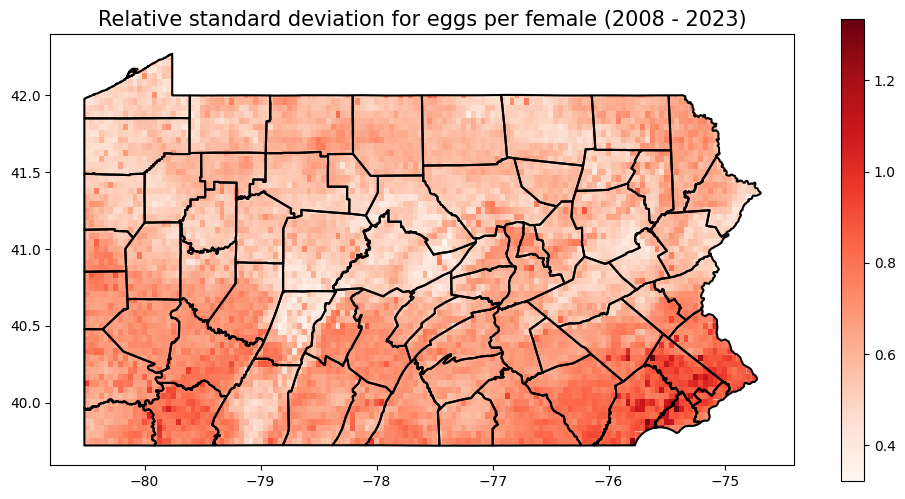

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df2 = pennsylvania_grids[['grid_id', 'col', 'row', 'geometry']].merge(df1[['Year','eggs', 'grid_id', 'egg_std']], on='grid_id')
df2.plot(column='egg_std', cmap='Reds', legend=True, ax=ax)
pennsylvania_county.boundary.plot(ax=ax, color='black')
plt.title('Relative standard deviation for eggs per female (2008 - 2023)', fontsize=15)

In [58]:
df2

,grid_id,col,row,geometry,Year,eggs,egg_std
0,1083_184,1083,184,"POLYGON ((-79.8626 42.22917, -79.85417 42.2321...",4.760952,2.729469,0.507808
1,1084_184,1084,184,"POLYGON ((-79.85417 42.23214, -79.84466 42.235...",4.760952,2.657536,0.477759
2,1085_184,1085,184,"POLYGON ((-79.8125 42.24886, -79.77083 42.2661...",4.760952,3.180671,0.541391
3,1086_184,1086,184,"POLYGON ((-79.77083 42.26617, -79.76195 42.269...",4.760952,2.658320,0.443053
4,1081_185,1081,185,"POLYGON ((-79.96745 42.1875, -79.9375 42.2013,...",4.760952,5.402160,0.474915
...,...,...,...,...,...,...,...
7447,1178_245,1178,245,"POLYGON ((-75.89583 39.72218, -75.9375 39.7221...",4.760952,3.011091,0.860312
7448,1179_245,1179,245,"POLYGON ((-75.85417 39.7222, -75.89583 39.7221...",4.760952,3.156343,0.855957
7449,1180_245,1180,245,"POLYGON ((-75.8125 39.7222, -75.85417 39.7222,...",4.760952,3.032463,0.851218
7450,1181_245,1181,245,"POLYGON ((-75.77083 39.72734, -75.77379 39.722...",4.760952,5.667157,1.295350


In [59]:
simulator.getGridForageQuality(1083, 184, 2008)

0.423942995500994

In [60]:
def getAverageForageQuality(col, row, years=range(2008, 2024)):
    forage_quality = []
    for year in years:
        forage_quality.append(simulator.getGridForageQuality(col, row, year))
    return np.mean(forage_quality)
    

In [61]:
df2['forage_quality'] = df2.apply(lambda x: getAverageForageQuality(x['col'], x['row']), axis=1)

Text(0.5, 1.0, 'Average forage quality (2008 - 2023)')

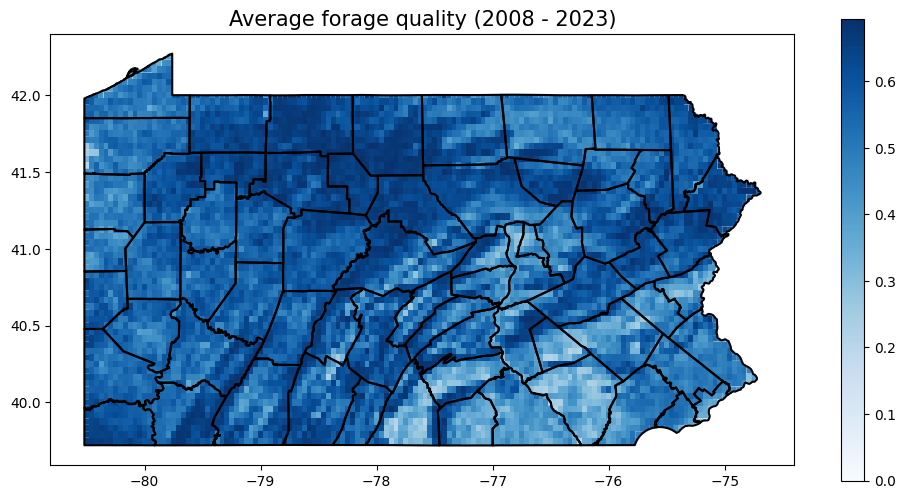

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
#df2 = pennsylvania_grids[['grid_id', 'col', 'row', 'geometry']].merge(df1[['Year','eggs', 'grid_id', 'egg_std']], on='grid_id')
df2.plot(column='forage_quality', cmap='Blues', legend=True, ax=ax)
pennsylvania_county.boundary.plot(ax=ax, color='black')
plt.title('Average forage quality (2008 - 2023)', fontsize=15)

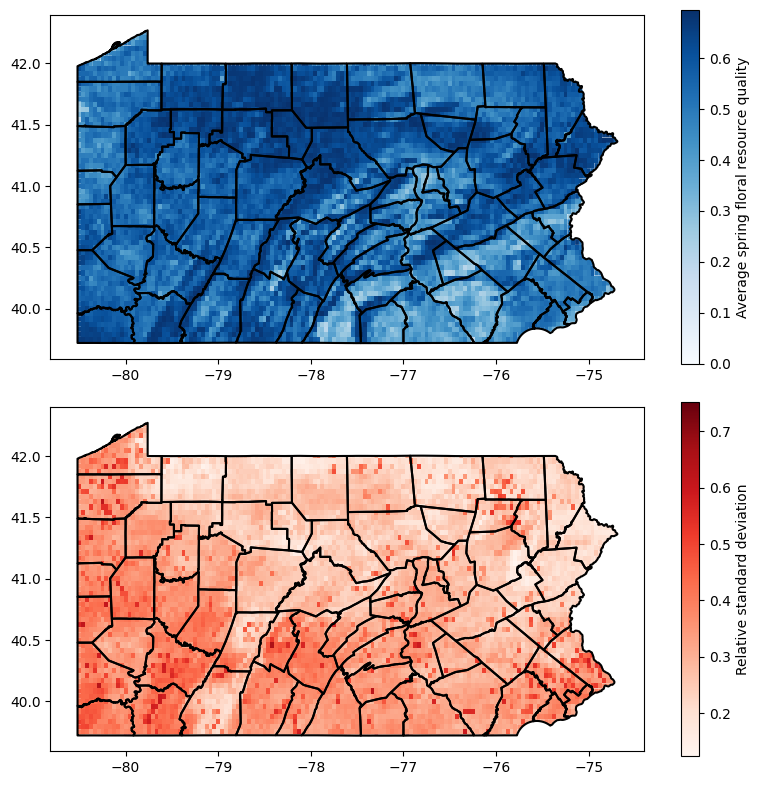

In [ ]:
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(8, 8))

df2.plot(column='egg_std', cmap='Reds', legend=True, ax=ax1 , legend_kwds={'label': "Relative standard deviation", 'orientation': "vertical"})
pennsylvania_county.boundary.plot(ax=ax1, color='black')
#plt.title('Relative standard deviation for eggs per female (2008 - 2023)', fontsize=15, ax=ax1)
#ax1.set_title('Relative standard deviation for eggs per female (2008 - 2023)', fontsize=13)

# sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm1.set_array([])
# cbar = fig.colorbar(sm1, ax=ax1, orientation='vertical')
# cbar.set_label('Average predicted eggs per female (2008-2023)', fontsize=12)

df2.plot(column='forage_quality', cmap='Blues', legend=True, ax=ax2, legend_kwds={'label': "Average spring floral resource quality", 'orientation': "vertical"})
pennsylvania_county.boundary.plot(ax=ax2, color='black')
#ax2.set_title('Average forage quality (2008 - 2023)', fontsize=13)

plt.tight_layout()

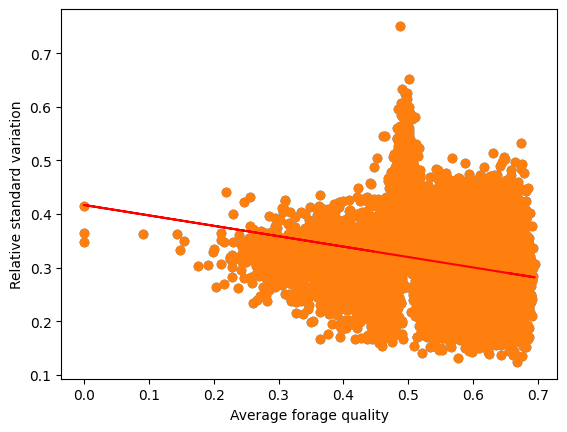

In [ ]:
import numpy as np
plt.scatter(df2['forage_quality'], df2['egg_std'])
# plt.xlabel('Average forage quality')
# plt.ylabel('Relative standard variation')
# plt.title('Average forage quality vs Relative standard variation')
import matplotlib.pyplot as plt

plt.scatter(df2['forage_quality'], df2['egg_std'])
plt.xlabel('Average forage quality')
plt.ylabel('Relative standard variation')

# Calculate the regression line
x = df2['forage_quality']
y = df2['egg_std']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()


Text(0.5, 1.0, 'Distribution Relative standard deviation')

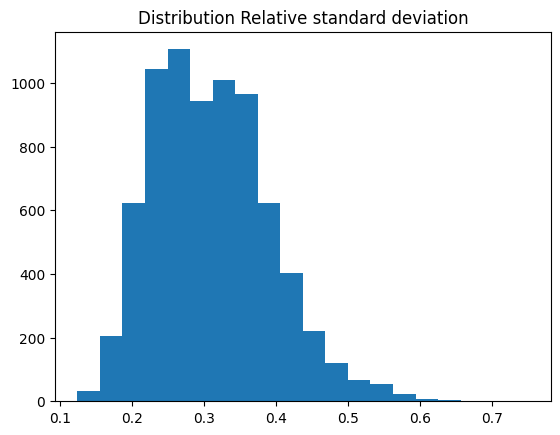

In [ ]:
plt.hist(df2['egg_std'], bins=20)
plt.title('Distribution Relative standard deviation')

Text(0.5, 1.0, 'Distribution of Average forage quality')

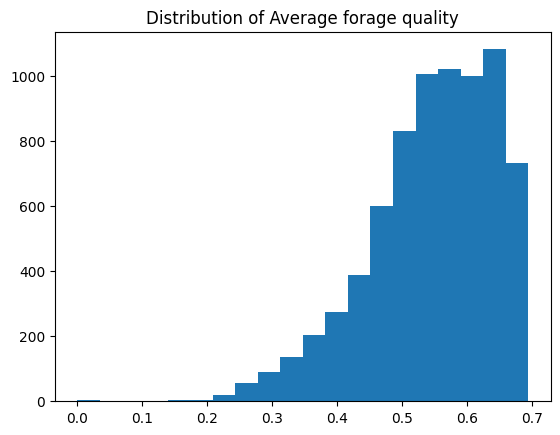

In [ ]:
plt.hist(df2['forage_quality'], bins=20)
plt.title('Distribution of Average forage quality')

In [ ]:
import statsmodels.api as sm

x = df2['forage_quality']
y = df2['egg_std']

# Add a constant column to the x data
x = sm.add_constant(x)

# Create the linear regression model
model = sm.OLS(y, x)

# Fit the model to the data
results = model.fit()

# Get the predicted values of y based on the model
y_pred = results.predict(x)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                egg_std   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     428.9
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.11e-92
Time:                        18:55:41   Log-Likelihood:                 8372.6
No. Observations:                7452   AIC:                        -1.674e+04
Df Residuals:                    7450   BIC:                        -1.673e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4169      0.005     80.059      0.000       0.407       0.427
forage_quality    -0.1945      0.009    -20.710      0.000      -0.213      -0.176
==============================================================================
Omnibus:                      426.314   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.358
Skew:                           0.619   Prob(JB):                    1.35e-109
Kurtosis:                       3.287   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_pa

,Year,eggs,col,row
0,2008,7,1083,184
1,2008,6,1084,184
2,2008,3,1085,184
3,2008,2,1086,184
4,2008,16,1081,185
...,...,...,...,...
119227,2023,10,1178,245
119228,2023,5,1179,245
119229,2023,6,1180,245
119230,2023,12,1181,245


In [ ]:
df_pa

,Year,eggs,col,row
0,2008,7,1083,184
1,2008,6,1084,184
2,2008,3,1085,184
3,2008,2,1086,184
4,2008,16,1081,185
...,...,...,...,...
119227,2023,10,1178,245
119228,2023,5,1179,245
119229,2023,6,1180,245
119230,2023,12,1181,245


In [ ]:
data1[f"egg_production_{year}"].tolist()

["{'eggs': np.int64(12), 'non_foraging_days': np.int64(8), 'precipitation_effect': np.int64(2), 'temperature_effect': np.int64(7), 'temps': [16.8348999023438, 11.0022993087769, 12.4759998321533, 12.2019996643066, 18.6704998016357, 10.5774993896484, 6.46619987487793, 9.1136999130249, 14.4766998291016, 16.2500991821289, 19.8344993591309, 21.3425998687744, 18.1434993743896, 19.1064987182617, 23.4913997650146, 14.6577997207642, 14.6455993652344, 13.2054996490479, 14.8682994842529, 14.1639995574951], 'ppts': [10.6703996658325, 9.43229961395264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'egg_days': ['2023-05-24', '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-07', '2023-06-08'], 'forage_quality': 0.440008734636479}",
 "{'eggs': np.int64(11), 'non_foraging_days': np.int64(9), 'precipitation_effect': np.int64(2), 'temperature_effect': np.int64(8), 'temps': [1

In [71]:
num_years = 16
start_year = 2008
for i in range(num_years):
    year = start_year + i
    data1[f"temp_effect_{year}"] = [eval(x)['temperature_effect'] for x in data1[f"egg_production_{year}"].tolist()]
    data1[f"precip_effect_{year}"] = [eval(x)['precipitation_effect'] for x in data1[f"egg_production_{year}"].tolist()]
    #data1[f"larvae_mortality_{year}"] = [eval(x)['egg_mortality'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    # egg_mortlity = []
    # for x in data1[f"egg_larvar_mortality_{year}"].tolist():
    #     try:
    #         dt = eval(x)
    #         egg_mortlity.append(dt['mortality'])
    #     except:
    #         egg_mortlity.append(0)
    # data1[f"larvae_mortality_{year}"] = egg_mortlity
    # #data1[f"larvae_cold_days_{year}"] = [eval(x)['cold_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    # #data1[f"larvae_hot_days_{year}"] = [eval(x)['hot_days'] for x in data1[f"egg_larva_mortality_{year}"].tolist()]
    # data1[f"wintering_mortality_{year}"] = [eval(x)['mortality'] for x in data1[f"winter_mortality_{year}"].tolist()]
    


/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [25]:
temps= eval(data1['egg_production_2008'][0])['temps']
precips = eval(data1['egg_production_2008'][0])['ppts']

In [30]:
def getColdRainyDays(temps, precips):
    temp_threshold = 13.9
    precip_threshold = 5

    cold_days = 0
    rainy_days = 0
    rainy_cold_days = 0

    for i in range(len(temps)):
        is_cold = temps[i] < temp_threshold
        is_rainy = precips[i] >= precip_threshold

        if is_cold:
            cold_days += 1
        if is_rainy:
            rainy_days += 1
        if is_cold and is_rainy:
            rainy_cold_days += 1

    return cold_days, rainy_days, rainy_cold_days


In [31]:
getColdRainyDays(temps, precips)

(9, 4, 0)

In [33]:
for i in range(num_years):
    year = start_year + i
    data1[f"cold_rainy_days_{year}"] = [getColdRainyDays(eval(x)['temps'], eval(x)['ppts']) for x in data1[f"egg_production_{year}"].tolist()]
    data1[f"cold_days_{year}"] = [x[0] for x in data1[f"cold_rainy_days_{year}"].tolist()]
    data1[f"rainy_days_{year}"] = [x[1] for x in data1[f"cold_rainy_days_{year}"].tolist()]
    data1[f"rainy_cold_days_{year}"] = [x[2] for x in data1[f"cold_rainy_days_{year}"].tolist()]

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame 

In [34]:
data1['cold_days_2008'].describe()

count    7452.000000
mean        9.979200
std         5.026914
min         0.000000
25%         4.000000
50%        11.000000
75%        14.000000
max        19.000000
Name: cold_days_2008, dtype: float64

In [35]:
data1['rainy_days_2008'].describe()

count    7452.000000
mean        5.201691
std         2.264483
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        13.000000
Name: rainy_days_2008, dtype: float64

In [36]:
data1['rainy_cold_days_2008'].describe()

count    7452.000000
mean        3.075013
std         2.468349
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        13.000000
Name: rainy_cold_days_2008, dtype: float64

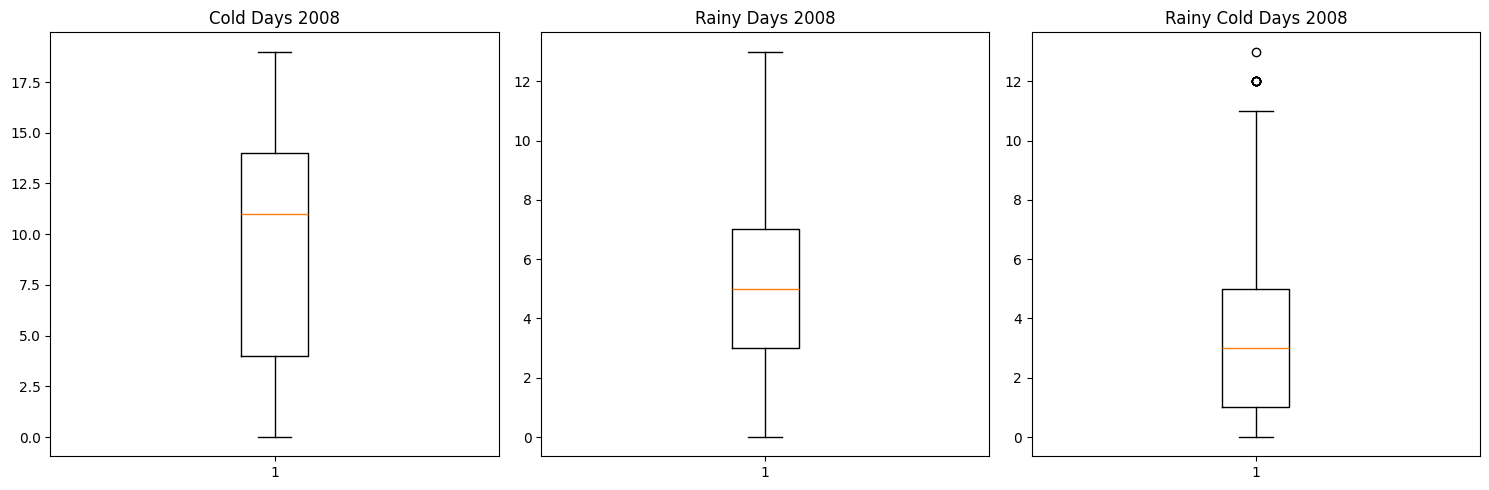

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Create 1 row and 3 columns of subplots

ax[0].boxplot(data1['cold_days_2008'])
ax[0].set_title('Cold Days 2008')

ax[1].boxplot(data1['rainy_days_2008'])
ax[1].set_title('Rainy Days 2008')

ax[2].boxplot(data1['rainy_cold_days_2008'])
ax[2].set_title('Rainy Cold Days 2008')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [72]:
years = []  
#offsprings = []
precips = []
temps = []
col = []
row = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    # # non_foraging days
    # non_foraging_days.extend(data1[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(data1[f"eggs_{year}"].tolist()))
    # # emergence date
    # emergence_dates.extend(data1[f"emergence_{year}"].tolist())
    # # precip_effect_days
    # precip_effect_days.extend(data1[f"precip_effect_{year}"].tolist())
    # # temp_effect_days
    # temp_effect_days.extend(data1[f"temp_effect_{year}"].tolist())
    # offsprings
    precips.extend(data1[f"precip_effect_{year}"].tolist())
    temps.extend(data1[f"temp_effect_{year}"].tolist())
    col.extend(data1['col'].tolist())
    row.extend(data1['row'].tolist())

df_pa1 = pd.DataFrame({'Year': years, 'precip': precips, 'temp': temps, 'col': col, 'row': row})

In [42]:
years = []  
#offsprings = []
cold = []
rainy = []
cold_rainy = []
col = []
row = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    # # non_foraging days
    # non_foraging_days.extend(data1[f"no_foraging_days_{year}"].tolist())
    years.extend([year] * len(data1[f"eggs_{year}"].tolist()))
    # # emergence date
    # emergence_dates.extend(data1[f"emergence_{year}"].tolist())
    # # precip_effect_days
    # precip_effect_days.extend(data1[f"precip_effect_{year}"].tolist())
    # # temp_effect_days
    # temp_effect_days.extend(data1[f"temp_effect_{year}"].tolist())
    # offsprings
    # precips.extend(data1[f"precip_effect_{year}"].tolist())
    # temps.extend(data1[f"temp_effect_{year}"].tolist())

    cold.extend(data1[f"cold_days_{year}"].tolist())
    rainy.extend(data1[f"rainy_days_{year}"].tolist())
    cold_rainy.extend(data1[f"rainy_cold_days_{year}"].tolist())


    col.extend(data1['col'].tolist())
    row.extend(data1['row'].tolist())

df_pa1 = pd.DataFrame({'Year': years, 'cold': cold, 'rainy': rainy, 'cold_rainy': cold_rainy ,'col': col, 'row': row})

In [43]:
import seaborn as sns


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021'),
  Text(14, 0, '2022'),
  Text(15, 0, '2023')])

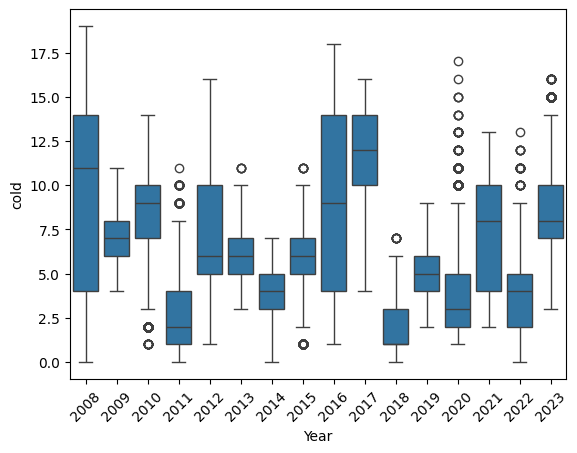

In [44]:
sns.boxplot(x='Year', y='cold', data=df_pa1)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021'),
  Text(14, 0, '2022'),
  Text(15, 0, '2023')])

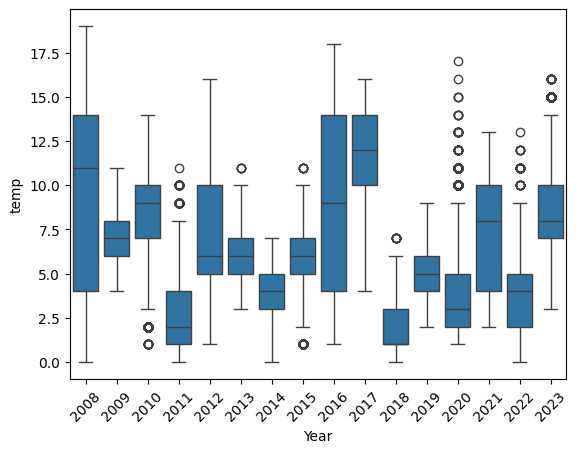

In [75]:
sns.boxplot(x='Year', y='temp', data=df_pa1)
plt.xticks(rotation=45)

In [45]:
df_pa1.rename(columns={'rainy': 'Precipitation', 'cold': 'Temperature', 'cold_rainy': 'Both'}, inplace=True)

In [46]:
df_pa1.groupby('Year').mean()

,Temperature,Precipitation,Both,col,row
Year,,,,,
2008,9.979200,5.201691,3.075013,1133.164117,217.135802
2009,7.194847,4.291868,1.313875,1133.164117,217.135802
2010,8.125872,4.316023,2.143854,1133.164117,217.135802
2011,2.611782,5.617552,0.509259,1133.164117,217.135802
2012,7.197397,4.190016,1.251074,1133.164117,217.135802
2013,6.091385,3.912641,0.707193,1133.164117,217.135802
2014,3.661299,4.083333,0.222759,1133.164117,217.135802
2015,6.110709,3.751342,0.360172,1133.164117,217.135802
2016,9.047370,4.476785,2.165996,1133.164117,217.135802


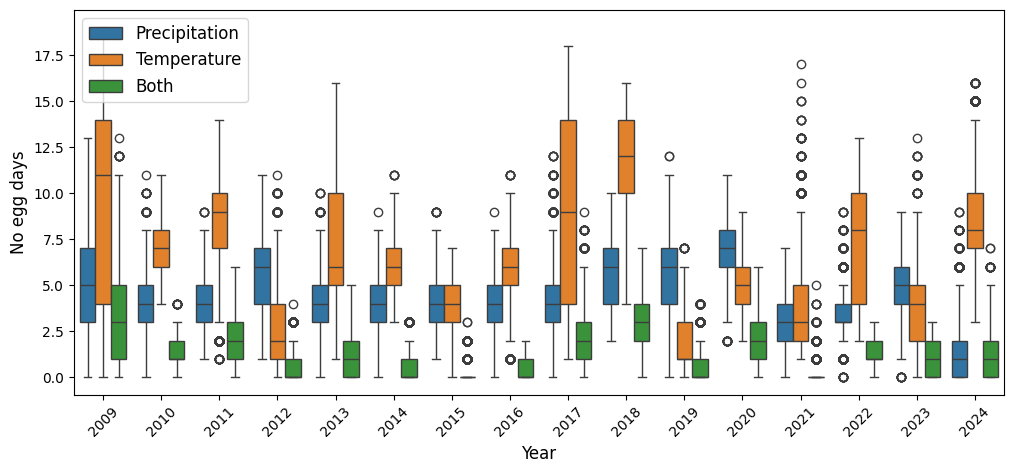

In [47]:
# Assuming your original DataFrame has columns like "Year", "precip", and "temps"
# Reshape the DataFrame to long format
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
df_long = pd.melt(df_pa1, id_vars=['Year'], value_vars=['Precipitation', 'Temperature', 'Both'],
                  var_name='Non foraging days due to', value_name='Value')

# Create the boxplot with two plots per year
sns.boxplot(x='Year', y='Value', hue='Non foraging days due to', data=df_long, ax=ax)
plt.xticks(rotation=45)
plt.ylabel('No egg days', fontsize=12)
plt.xlabel('Year', fontsize=12)
#plt.title("Boxplots of Precipitation and Temperature effect on Non foraging days (2008 - 2023)")
plt.legend(fontsize=12)
plt.xticks(np.arange(16).tolist(), np.arange(2009,2025).tolist())
plt.show()


In [98]:
df_long

,Year,Non foraging days due to,Value
0,2008,Precipitation,4
1,2008,Precipitation,3
2,2008,Precipitation,4
3,2008,Precipitation,3
4,2008,Precipitation,2
...,...,...,...
238459,2023,Temperature,14
238460,2023,Temperature,14
238461,2023,Temperature,13
238462,2023,Temperature,13


In [97]:
df_long[['Year','Non foraging days due to']].groupby('Year')

TypeError: agg function failed [how->mean,dtype->object]

In [79]:
from scipy.stats import ttest_ind

# Separate the temperature and precipitation data
temperature_days = df_pa1['Temperature']
precipitation_days = df_pa1['Precipitation']

# Perform the one-tailed independent t-test
t_stat, p_value = ttest_ind(temperature_days, precipitation_days, alternative='greater')

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print("Reject the null hypothesis: Temperature mean is significantly higher than precipitation mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference or precipitation mean may be higher.")


T-statistic: 158.2282
P-value: 0.0000
Reject the null hypothesis: Temperature mean is significantly higher than precipitation mean.


In [380]:
df_pa1.groupby('Year', as_index=False).mean()

,Year,Precipitation,Temperature,col,row
0,2008,11.142110,17.171229,1133.164117,217.135802
1,2009,9.029791,17.798309,1133.164117,217.135802
2,2010,8.997048,16.715915,1133.164117,217.135802
3,2011,10.469404,13.065754,1133.164117,217.135802
4,2012,9.482555,16.442968,1133.164117,217.135802
5,2013,9.092324,14.285695,1133.164117,217.135802
6,2014,8.913178,15.737386,1133.164117,217.135802
7,2015,8.757649,11.723698,1133.164117,217.135802
8,2016,11.544015,16.245572,1133.164117,217.135802
9,2017,11.566425,18.026838,1133.164117,217.135802


Text(0.5, 1.0, 'Distribution of temperature effect days')

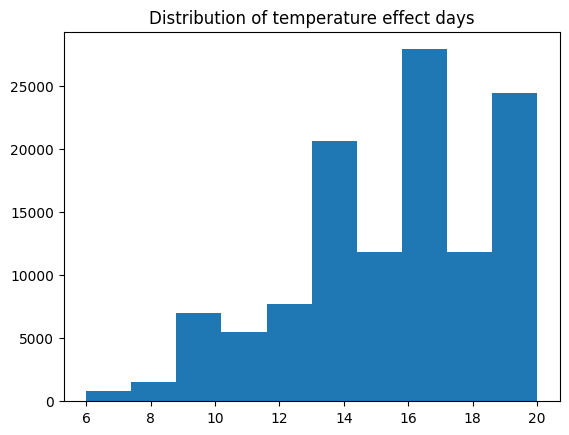

In [404]:
plt.hist(temperature_days, bins=10)
plt.title('Distribution of temperature effect days')

Text(0.5, 1.0, 'Distribution of precipitation effect days')

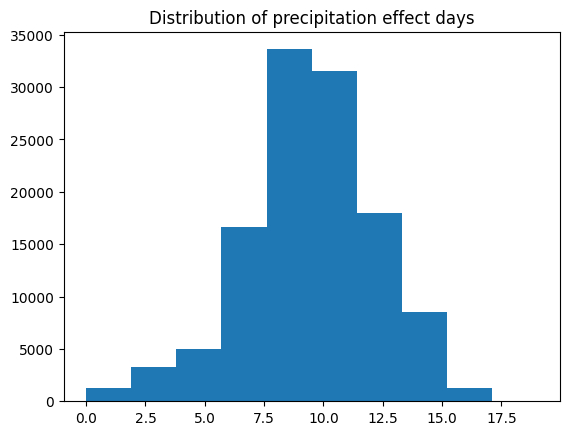

In [406]:
plt.hist(precipitation_days, bins=10)
plt.title('Distribution of precipitation effect days')

In [80]:
np.mean(temperature_days)

np.float64(6.375679347826087)

In [81]:
np.std(temperature_days)

np.float64(3.822241175203712)

In [82]:
np.mean(precipitation_days)

np.float64(4.404824208266238)

In [86]:
np.std(precipitation_days)


np.float64(1.9719882003672484)

In [84]:
len(precipitation_days) + len(temperature_days) -2

238462

In [407]:
############# Load Emperical Data #############

In [408]:
# Turley data

In [501]:

data = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/data/doi_10_5061_dryad_9kd51c5mc__v20220727/Turley_et_al_ECOEVO_blue_vane_bee_collection_data.csv')

In [502]:
data_osmia = data[data['genus'] == 'Osmia']

In [503]:
data_osmia.groupby('year', as_index=False).count()

,year,ID,month,month2,day,family,genus,species,taxa,farm,farm.block
0,2014,10,10,10,10,10,10,10,10,10,10
1,2015,58,58,58,58,58,58,58,58,58,58
2,2016,47,47,47,47,47,47,47,47,47,47
3,2017,26,26,26,26,26,26,26,26,26,26
4,2018,27,27,27,27,27,27,27,27,27,27
5,2019,15,15,15,15,15,15,15,15,15,15


In [504]:
data_cornifrons = data_osmia[data_osmia['species'] == 'cornifrons']

([<matplotlib.axis.XTick at 0x2a691f680>,
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017'),
  Text(4, 0, '2018'),
  Text(5, 0, '2019')])

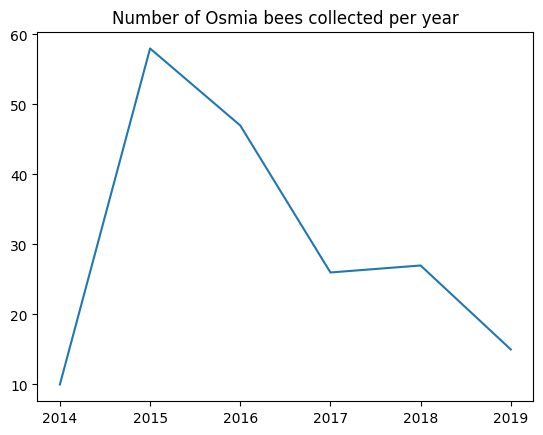

In [505]:
data_osmia.groupby('year', as_index=False).count()['ID'].plot()
plt.title('Number of Osmia bees collected per year')
plt.xticks([0, 1, 2, 3, 4, 5], [2014, 2015, 2016, 2017, 2018, 2019])

([<matplotlib.axis.XTick at 0x2f18ff1d0>,
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019')])

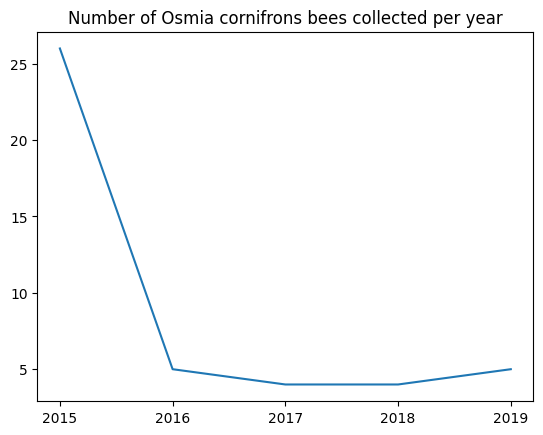

In [433]:
data_cornifrons.groupby('year', as_index=False).count()['ID'].plot()
plt.title('Number of Osmia cornifrons bees collected per year')
plt.xticks([0, 1, 2, 3, 4], [2015, 2016, 2017, 2018, 2019])


In [440]:
dt_e = df_pa.groupby('Year', as_index=False).mean()#['eggs'].plot()

In [446]:
dt_e_selected = dt_e[(dt_e['Year'] >= 2014) & (dt_e['Year'] <= 2019)]
dt_e_selected


,Year,eggs,col,row
6,2014,2.144391,1133.164117,217.135802
7,2015,4.864332,1133.164117,217.135802
8,2016,3.466586,1133.164117,217.135802
9,2017,1.809179,1133.164117,217.135802
10,2018,5.610038,1133.164117,217.135802
11,2019,0.357622,1133.164117,217.135802


([<matplotlib.axis.XTick at 0x2f34416a0>,
 [Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019')])

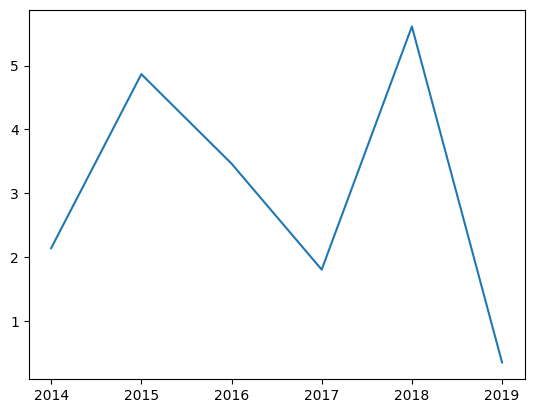

In [453]:
dt_e_selected['eggs'].plot(x='Year', y='eggs')
plt.xticks([6, 7, 8, 9, 10, 11], [2014, 2015, 2016, 2017, 2018, 2019])

In [455]:
dt_e_selected = dt_e_selected.reset_index()

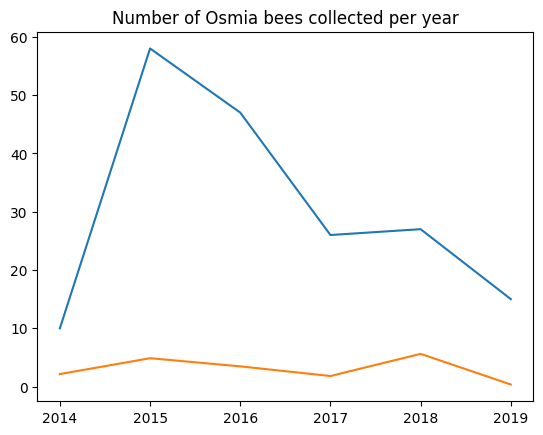

In [456]:
data_osmia.groupby('year', as_index=False).count()['ID'].plot()
plt.title('Number of Osmia bees collected per year')
plt.xticks([0, 1, 2, 3, 4, 5], [2014, 2015, 2016, 2017, 2018, 2019])

dt_e_selected['eggs'].plot(x='Year', y='eggs')
plt.xticks([0, 1, 2, 3, 4, 5], [2014, 2015, 2016, 2017, 2018, 2019])

plt.show()


In [464]:
dt_e_selected['eggs'].tolist()

[2.1443907675791736,
 4.864331723027375,
 3.46658615136876,
 1.8091787439613527,
 5.610037573805689,
 0.35762211486849166]

Text(0, 0.5, 'Eggs per female')

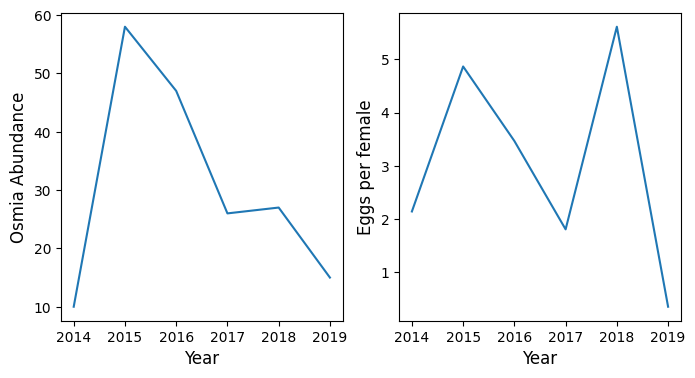

In [468]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

font_size = 12
ax1.plot([2014, 2015, 2016, 2017, 2018, 2019], data_osmia.groupby('year', as_index=False).count()['ID'].tolist())
ax1.set_xlabel('Year', fontsize=font_size)
ax1.set_ylabel('Osmia Abundance', fontsize=font_size)

ax2.plot([2014, 2015, 2016, 2017, 2018, 2019], dt_e_selected['eggs'].tolist())
ax2.set_xlabel('Year', fontsize=font_size)
ax2.set_ylabel('Eggs per female', fontsize=font_size)

In [499]:
np.array(osmia_abundance)/np.mean(osmia_abundance)

array([0.32786885, 1.90163934, 1.54098361, 0.85245902, 0.8852459 ,
       0.49180328])

In [475]:
np.array([2, 5, 4, 3, 3, 6])/np.mean()

array([2, 5, 4, 3, 3, 6])

Pearson Correlation: 0.62 (p-value: 0.1906)
Spearman Correlation: 0.66 (p-value: 0.1562)
R-squared: 0.38
RMSE: 0.47


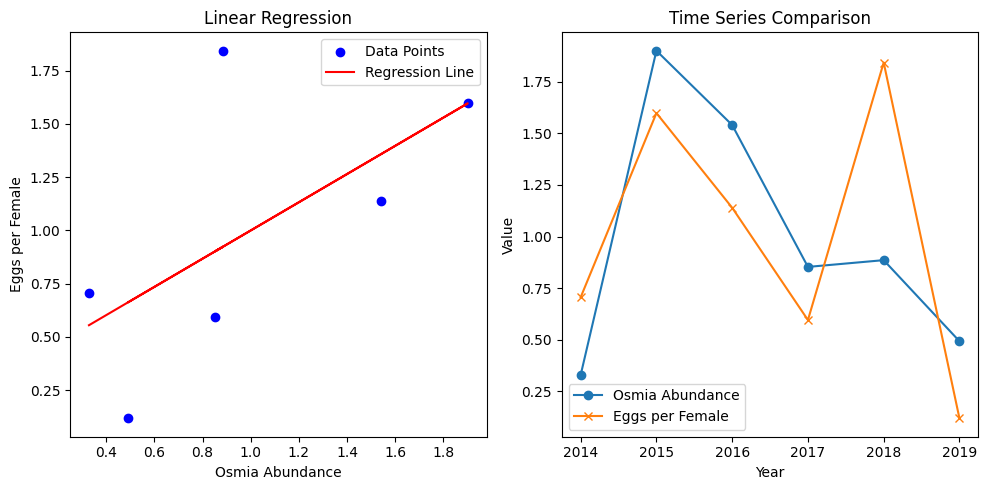

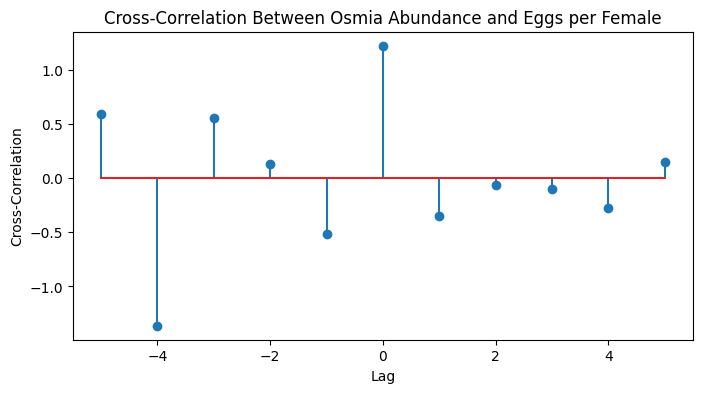

In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Replace these with your actual data
years = np.array([2014, 2015, 2016, 2017, 2018, 2019])
osmia_abundance = np.array(data_osmia.groupby('year', as_index=False).count()['ID'].tolist()) #np.array([10, 60, 50, 30, 25, 20])  # Osmia abundance values
osmia_abundance = osmia_abundance/np.mean(osmia_abundance)
eggs_per_female = np.array(dt_e_selected['eggs'].tolist()) #np.array([2, 5, 4, 3, 3, 6])      # Eggs per female values
eggs_per_female = eggs_per_female/np.mean(eggs_per_female)

# Correlation Analysis
pearson_corr, pearson_p = pearsonr(osmia_abundance, eggs_per_female)
spearman_corr, spearman_p = spearmanr(osmia_abundance, eggs_per_female)

print(f"Pearson Correlation: {pearson_corr:.2f} (p-value: {pearson_p:.4f})")
print(f"Spearman Correlation: {spearman_corr:.2f} (p-value: {spearman_p:.4f})")

# Linear Regression
X = osmia_abundance.reshape(-1, 1)
y = eggs_per_female

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Goodness-of-Fit Metrics
r2 = r2_score(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plotting the original data and regression line
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(osmia_abundance, eggs_per_female, color='blue', label='Data Points')
plt.plot(osmia_abundance, predictions, color='red', label='Regression Line')
plt.xlabel("Osmia Abundance")
plt.ylabel("Eggs per Female")
plt.title("Linear Regression")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(years, osmia_abundance, label='Osmia Abundance', marker='o')
plt.plot(years, eggs_per_female, label='Eggs per Female', marker='x')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Time Series Comparison")
plt.legend()

plt.tight_layout()
plt.show()

# Cross-Correlation
cross_corr = np.correlate(osmia_abundance - np.mean(osmia_abundance), 
                          eggs_per_female - np.mean(eggs_per_female), mode='full')
lags = np.arange(-len(osmia_abundance) + 1, len(osmia_abundance))

plt.figure(figsize=(8, 4))
plt.stem(lags, cross_corr)
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation Between Osmia Abundance and Eggs per Female")
plt.show()


In [478]:
## Look at the other data ###

In [479]:
data =  pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/Python_scripts/data/saae014_suppl_supplementary_materials/Supplemental_2_bee_collections_dataset_2021_2022_Turley_et_al_2024_Annals_of_the_Entomological_Society_of_America.csv')

In [489]:
data_osmia = data[data['genus'] == 'Osmia']
data_osmia = data_osmia.reset_index()

In [490]:
data_osmia['eventDate'] = pd.to_datetime(data_osmia['eventDate'])

In [497]:
data_osmia['eventDate'] = pd.to_datetime(data_osmia['eventDate'])
data_osmia['year'] = data_osmia['eventDate'].dt.year


In [498]:
data_osmia.groupby('year').count()

,index,catalogNumber,county,locality,decimalLatitude,decimalLongitude,eventDate,samplingProtocol,recordedBy,family,genus,specificEpithet,sciName
year,,,,,,,,,,,,,
2021,2,2,2,2,2,2,2,2,2,2,2,2,2
2022,144,144,144,144,144,144,144,144,144,144,144,144,144


In [51]:
### Evaluate the most significant life stage ###

In [53]:
data1.columns.tolist()

['Unnamed: 0',
 'col',
 'row',
 'grid_id',
 'emergence_2008',
 'emergence_2009',
 'emergence_2010',
 'emergence_2011',
 'emergence_2012',
 'emergence_2013',
 'emergence_2014',
 'emergence_2015',
 'emergence_2016',
 'emergence_2017',
 'emergence_2018',
 'emergence_2019',
 'emergence_2020',
 'emergence_2021',
 'emergence_2022',
 'emergence_2023',
 'egg_production_2008',
 'egg_production_2009',
 'egg_production_2010',
 'egg_production_2011',
 'egg_production_2012',
 'egg_production_2013',
 'egg_production_2014',
 'egg_production_2015',
 'egg_production_2016',
 'egg_production_2017',
 'egg_production_2018',
 'egg_production_2019',
 'egg_production_2020',
 'egg_production_2021',
 'egg_production_2022',
 'egg_production_2023',
 'egg_larvar_mortality_2008',
 'egg_larvar_mortality_2009',
 'egg_larvar_mortality_2010',
 'egg_larvar_mortality_2011',
 'egg_larvar_mortality_2012',
 'egg_larvar_mortality_2013',
 'egg_larvar_mortality_2014',
 'egg_larvar_mortality_2015',
 'egg_larvar_mortality_2016',

In [54]:
# emergence dates
data1['emergence_2008'].tolist()

['2008-05-19',
 '2008-05-17',
 '2008-05-12',
 '2008-05-09',
 '2008-05-18',
 '2008-05-13',
 '2008-05-09',
 '2008-05-09',
 '2008-05-12',
 '2008-05-18',
 '2008-05-16',
 '2008-05-16',
 '2008-05-15',
 '2008-05-12',
 '2008-05-09',
 '2008-05-09',
 '2008-05-13',
 '2008-05-17',
 '2008-05-18',
 '2008-05-26',
 '2008-05-15',
 '2008-05-12',
 '2008-05-09',
 '2008-05-08',
 '2008-05-09',
 '2008-05-11',
 '2008-05-15',
 '2008-05-19',
 '2008-05-19',
 '2008-05-19',
 '2008-05-26',
 '2008-05-11',
 '2008-05-11',
 '2008-05-08',
 '2008-05-07',
 '2008-05-08',
 '2008-05-09',
 '2008-05-11',
 '2008-05-13',
 '2008-05-15',
 '2008-05-16',
 '2008-05-18',
 '2008-05-25',
 '2008-05-28',
 '2008-05-26',
 '2008-05-08',
 '2008-05-08',
 '2008-05-08',
 '2008-05-07',
 '2008-05-08',
 '2008-05-09',
 '2008-05-10',
 '2008-05-12',
 '2008-05-12',
 '2008-05-16',
 '2008-05-16',
 '2008-05-16',
 '2008-05-17',
 '2008-05-19',
 '2008-05-26',
 '2008-05-27',
 '2008-05-08',
 '2008-05-08',
 '2008-05-08',
 '2008-05-08',
 '2008-05-08',
 '2008-05-

In [59]:
from datetime import datetime

def date_to_julian(date, year=2000):
    # Convert a datetime object to Julian date
    return date.timetuple().tm_yday + (date.year - year) * 365 + (date.year - year) // 4


date_to_julian(datetime(2023, 10, 1), year=2023)

274

In [56]:
data1['emergence_2008'].apply(lambda x: date_to_julian(datetime.strptime(x, '%Y-%m-%d'), year=2008))

0       3062
1       3060
2       3055
3       3052
4       3061
        ... 
7447    3041
7448    3041
7449    3040
7450    3040
7451    3039
Name: emergence_2008, Length: 7452, dtype: int64

In [63]:
data1['larvae_mortality_2008']

0       0.0
1       0.0
2       0.2
3       0.0
4       0.0
       ... 
7447    0.2
7448    0.2
7449    0.1
7450    0.2
7451    0.1
Name: larvae_mortality_2008, Length: 7452, dtype: float64

In [71]:
years = []  
offspring = []
julian_dates = []
eggs = []
larva_mortality = []
winter_mortality = []
col = []
row = []

num_years = 16
# non_foraging_days
for i in range(num_years):
    year = 2008 + i
    years.extend([year] * len(data1[f"eggs_{year}"].tolist())) # year for each row
    col.extend(data1['col'].tolist()) # column for each row
    row.extend(data1['row'].tolist()) # row for each row

    # emergence date
    julian_dates.extend(data1[f"emergence_{year}"].apply(lambda x: date_to_julian(datetime.strptime(x, '%Y-%m-%d'), year=year)).tolist())

    # egg production
    eggs.extend(data1[f"eggs_{year}"].tolist())

    # larva mortality
    larva_mortality.extend(data1[f"larvae_mortality_{year}"].tolist())

    # winter mortality
    winter_mortality.extend(data1[f"wintering_mortality_{year}"].tolist())

    # offspring
    offspring.extend(data1[f"offspring_{year}"].tolist())

df_pa2 = pd.DataFrame({
    'Year': years,
    'julian_date': julian_dates,
    'eggs': eggs,
    'larva_mortality': larva_mortality,
    'winter_mortality': winter_mortality,
    'offspring': offspring,
    'col': col,
    'row': row
})

In [72]:
df_pa2

,Year,julian_date,eggs,larva_mortality,winter_mortality,offspring,col,row
0,2008,140,3,0.0,0.1150,2.6550,1083,184
1,2008,138,2,0.0,0.1125,1.7750,1084,184
2,2008,133,1,0.2,0.1125,0.7100,1085,184
3,2008,130,1,0.0,0.1125,0.8875,1086,184
4,2008,139,6,0.0,0.1150,5.3100,1081,185
...,...,...,...,...,...,...,...,...
119227,2023,109,0,0.0,0.1075,0.0000,1178,245
119228,2023,109,0,0.0,0.1075,0.0000,1179,245
119229,2023,111,0,0.0,0.1100,0.0000,1180,245
119230,2023,109,1,0.4,0.1100,0.5340,1181,245


In [73]:
df_pa2.rename(columns={
    'julian_date': 'Julian Emergence Date',
    'eggs': 'Egg Production',
    'larva_mortality': 'Egg and Larva Mortality',
    'winter_mortality': 'Winter Mortality',
    'offspring': 'Offspring'
}, inplace=True)

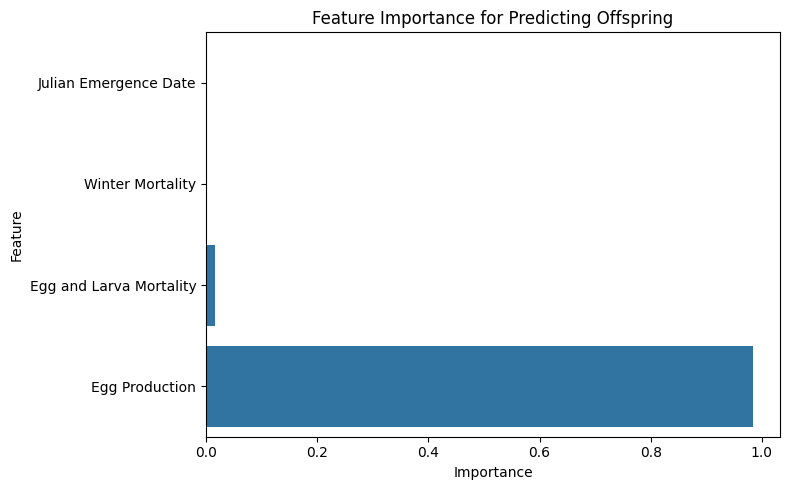

Egg Production             0.983477
Egg and Larva Mortality    0.015963
Winter Mortality           0.000542
Julian Emergence Date      0.000019
dtype: float64


In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features and target
features = ['Julian Emergence Date', 'Egg Production', 'Egg and Larva Mortality', 'Winter Mortality']
target = 'Offspring'

X = df_pa2[features]
y = df_pa2[target]

# Step 2: Split into train/test (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Get and plot feature importances
importances = pd.Series(model.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance for Predicting Offspring')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Optional: Print numerical values
print(importances.sort_values(ascending=False))


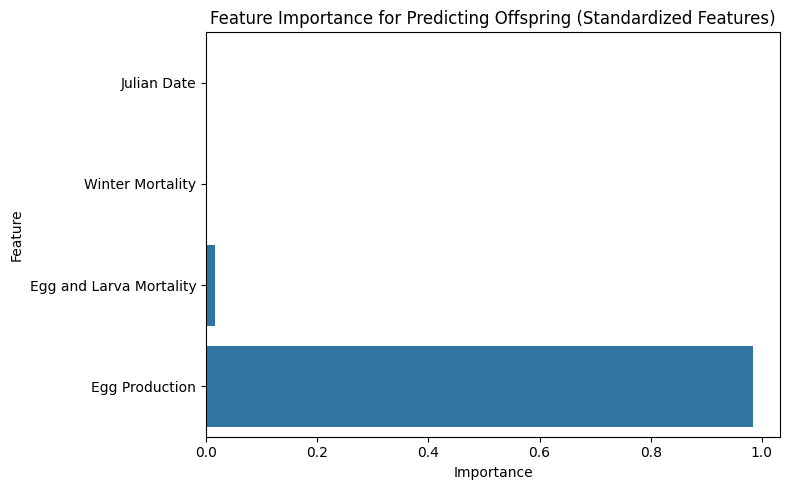

Egg Production             0.983477
Egg and Larva Mortality    0.015963
Winter Mortality           0.000542
Julian Date                0.000019
dtype: float64


In [70]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features and target
features = ['Julian Date', 'Egg Production', 'Egg and Larva Mortality', 'Winter Mortality']
target = 'Offspring'

X = df_pa2[features]
y = df_pa2[target]

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Fit Random Forest on standardized features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 5: Get and plot feature importances
importances = pd.Series(model.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance for Predicting Offspring (Standardized Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Optional: Print numerical values
print(importances.sort_values(ascending=False))
